In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"

data_train = pd.read_csv(train_file, engine='python')
data_test = pd.read_csv(test_file, engine='python')

# fill nan to mean
data_train = data_train.fillna('None')

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
data_train.ix[0][0]

1

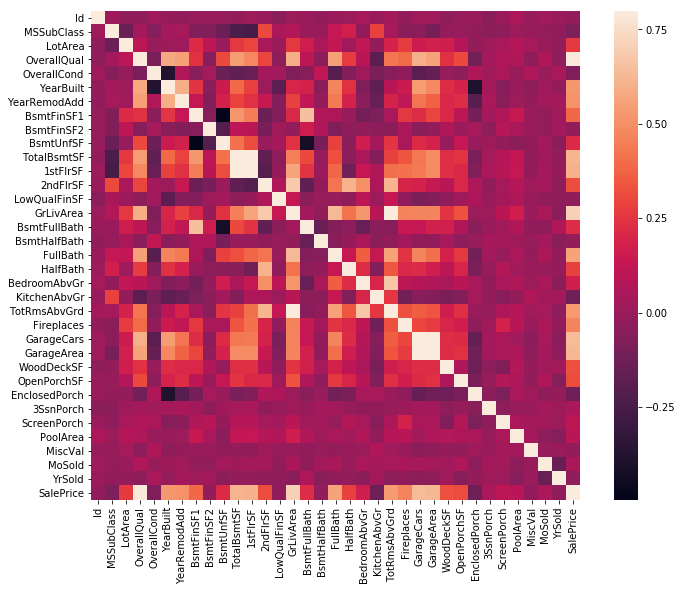

In [5]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

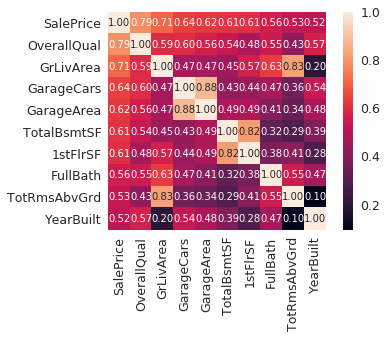

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [6]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
display(cols)

In [7]:
dummy_train = pd.get_dummies(data_train)
dummy_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


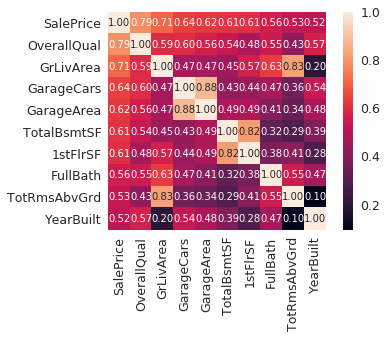

array([0.52289733, 0.57232277, 0.19900971, 0.53785009, 0.47895382,
       0.391452  , 0.28198586, 0.46827079, 0.09558913, 1.        ])

In [8]:
#saleprice correlation matrix
cm = np.corrcoef(dummy_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
display(cm[cm.shape[0]-1])

In [9]:
display(dummy_train.columns)
display(cols)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=839)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [10]:
# corr mat이 0.8보다 큰 경우
corr = np.corrcoef(dummy_train.values.T)
display(corr.shape)
#corr[np.where(abs(corr) >=0.8)].shape
#dummy_train[np.where(abs(corr) >=0.8)[0]]
# 중복제거 및 corr >= 0.8 인 경우
corr_idx = np.where(abs(corr) >=0.5)
#corr_idx = np.where(corr_idx != 1)
corr_idx = np.unique(corr_idx)
display(corr_idx)

#dummy_train.loc[corr_idx]

(839, 839)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
# Train data(dummy)로 corrmat 생성
corrmat = dummy_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.3)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

OverallQual              0.790982
YearBuilt                0.522897
YearRemodAdd             0.507101
BsmtFinSF1               0.386420
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
GrLivArea                0.708624
FullBath                 0.560664
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF               0.324413
OpenPorchSF              0.315856
SalePrice                1.000000
Neighborhood_NoRidge     0.330424
Neighborhood_NridgHt     0.402149
Exterior1st_VinylSd      0.305009
Exterior2nd_VinylSd      0.306389
MasVnrType_None         -0.367456
MasVnrType_Stone         0.330476
MasVnrArea_0.0          -0.367806
ExterQual_Ex             0.451164
ExterQual_Gd             0.452466
ExterQual_TA            -0.589044
Foundation_CBlock       -0.343263
Foundation_PConc         0.497734
BsmtQual_Ex              0.553105
BsmtQual_TA   

(45,)

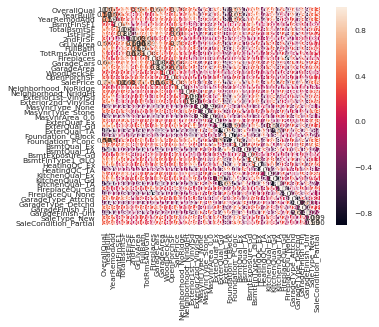

In [12]:
cm = np.corrcoef(dummy_train[predict_cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=predict_cols.values, xticklabels=predict_cols.values)
plt.show()

In [13]:

from sklearn.ensemble import RandomForestRegressor

# pull data into target (y) and predictors (X)
train_y = dummy_train.SalePrice

predictor_cols = list(predict_cols)
predictor_cols.remove('BsmtFinSF1')
predictor_cols.remove('TotalBsmtSF')
predictor_cols.remove('GarageCars')
predictor_cols.remove( 'GarageArea')
predictor_cols.remove('SalePrice')
# predictor_cols = dummy_train.keys()

# ###########3
# display(cols)
# cols = list(cols)
# cols.pop(10)
# ##############

# Create training predictors data

train_X = dummy_train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
# Read the test data
data_test = pd.read_csv('./data/test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
data_test = data_test.fillna('None')
dummy_test = pd.get_dummies(data_test)

# Set test_X from data_set
test_X = dummy_test[predictor_cols]
# display(dummy_test[predictor_cols].isnull().sum())

# Use the model to make predictions
predicted_prices = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(predicted_prices)

[114500. 136975. 163314. ... 148405. 128450. 207850.]


In [15]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
y_train = dummy_train.SalePrice

display(train_X.head())

model_xgb.fit(train_X, train_y)
xgb_train_pred = model_xgb.predict(test_X)
xgb_pred = np.expm1(model_xgb.predict(test_X))
predicted_prices = xgb_train_pred
print(predicted_prices)


,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,WoodDeckSF,...,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_None,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,7,2003,2003,856,854,1710,2,8,0,0,...,1,0,0,1,1,0,0,0,0,0
1,6,1976,1976,1262,0,1262,2,6,1,298,...,0,1,0,0,1,0,0,0,0,0
2,7,2001,2002,920,866,1786,2,6,1,0,...,1,0,0,0,1,0,0,0,0,0
3,7,1915,1970,961,756,1717,1,7,1,0,...,1,0,1,0,0,1,0,1,0,0
4,8,2000,2000,1145,1053,2198,2,9,1,192,...,1,0,0,0,1,0,0,0,0,0


[123927.695 150909.03  187662.23  ... 148350.1   118904.58  200004.66 ]


In [16]:
my_submission = pd.DataFrame({'Id': dummy_test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_XGB.csv', index=False)